In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [4]:
zero_one_colourmap_pts = ListedColormap(('red', 'green')) # utilized for plotting a scatter plot.
#Class 0 pts will be  denoted by red color and class 1 pts will be denoted by green color.
zero_one_colourmap_boundary = ListedColormap(('#FFCCCB', '#90EE90')) # used for plotting a decision boundary.

In [5]:
# this code is used for plotting the decision boundary

def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap_boundary)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap_pts)(i), label = j)
        plt.title('SVM Decision Boundary')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
    return plt.show()

In [6]:
# A user-defined function to get 2parameters ie., input_gamma, input_C and create a classifier, fit my classifier x & y,
# and i make  prediction and calculate the accuracy.Once the ac is calculated, I return the classifier from the function.
def generate_clf(input_gamma, input_C=1):
    classifier = SVC(kernel="poly", gamma=input_gamma, C=input_C)
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    print("Training Accuracy = {}".format(accuracy_score(y_pred, y)))
    return classifier

In [7]:
#I generate 200 samples with 2 features, ie., x1 and x2 and one target variable 'y'.
X, y = make_classification(n_samples=200, n_features=2,n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,random_state=44)

In [8]:
X

array([[-1.22223791e+00,  8.16592517e-01],
       [-1.35789436e+00,  8.08507931e-01],
       [-5.97575310e-01,  1.15684855e+00],
       [ 7.16886761e-01, -1.21853828e+00],
       [-2.27157135e-01,  3.90440377e-01],
       [-2.08497833e-02, -9.18447691e-01],
       [ 1.04139473e+00, -7.48340375e-01],
       [-2.62110666e-01,  1.46959992e+00],
       [-7.87875539e-01, -2.12543622e+00],
       [ 1.04749767e+00,  1.73771308e+00],
       [ 1.96243431e+00,  1.66491666e+00],
       [ 1.34681786e+00,  1.49315662e+00],
       [-7.40718433e-01, -1.27585188e-01],
       [-2.89884731e-01, -1.38129380e+00],
       [-1.96187123e+00, -1.65812610e+00],
       [-4.23608730e-01,  1.38531242e+00],
       [-8.91632783e-01, -2.62613148e-01],
       [-1.42230056e+00, -7.36686093e-01],
       [-6.44252953e-01,  9.75429214e-01],
       [ 1.38469970e+00,  1.37958053e+00],
       [ 1.89794826e+00,  1.95419971e+00],
       [-1.06670595e+00, -1.47363847e+00],
       [ 9.36814017e-01, -3.89518834e-02],
       [ 2.

In [9]:
y

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0])

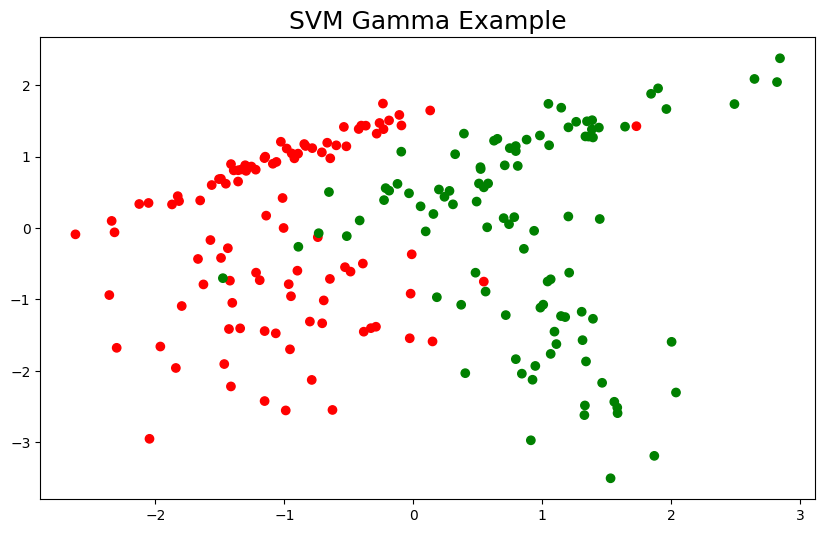

In [10]:
#scatter plot of my dataset
plt.figure(figsize=(10,6))
plt.title("SVM Gamma Example", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap=zero_one_colourmap_pts)
#red points signify the class 0 samples and green points signifies the class 1 samples.

# Classifier 1 - Gamma = 0.001

In [11]:
classifier_1 = generate_clf(0.001)

Training Accuracy = 0.505


C:\Users\Chetan\AppData\Local\Temp\ipykernel_21396\1724256829.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


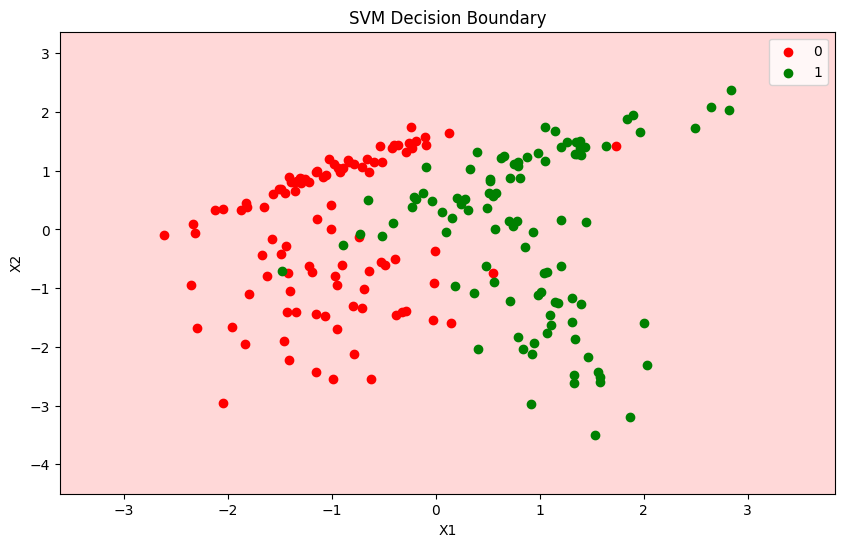

In [12]:
plot_decision_boundary(X, y, classifier_1)

##### Inference
All the points ar classified as red points. The background red signifies the entire region has been classified as 0's. So ideally this entire classifier with Gamma=0.001 is not doing a good job as it classifies every point to be class 0. The reason why because, we have choosen a very low value of Gamma which indicates a large similarity distance which results in more points being grouped together.

* Solution: Look for higher value of gamma.

# Classifier 2 - Gamma = 0.01
Create a classifier with a gamma value of 0.01.

In [13]:
classifier_2 = generate_clf(0.01)

Training Accuracy = 0.505


C:\Users\Chetan\AppData\Local\Temp\ipykernel_21396\1724256829.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


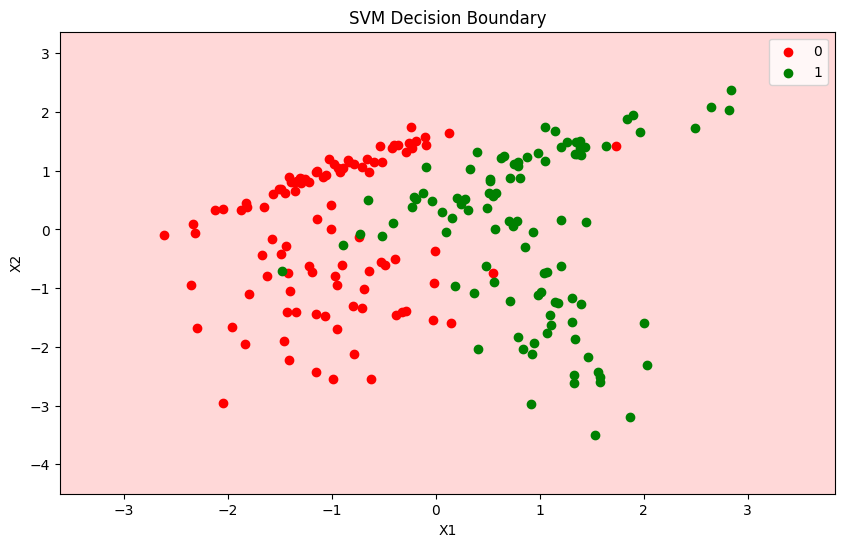

In [14]:
plot_decision_boundary(X, y, classifier_2)

#### Inference
Not much difference.

* Solution: Look for higher gamma value.

# Classifier 3 - Gamma = 0.1

In [15]:
classifier_3 = generate_clf(0.1)

Training Accuracy = 0.795


C:\Users\Chetan\AppData\Local\Temp\ipykernel_21396\1724256829.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


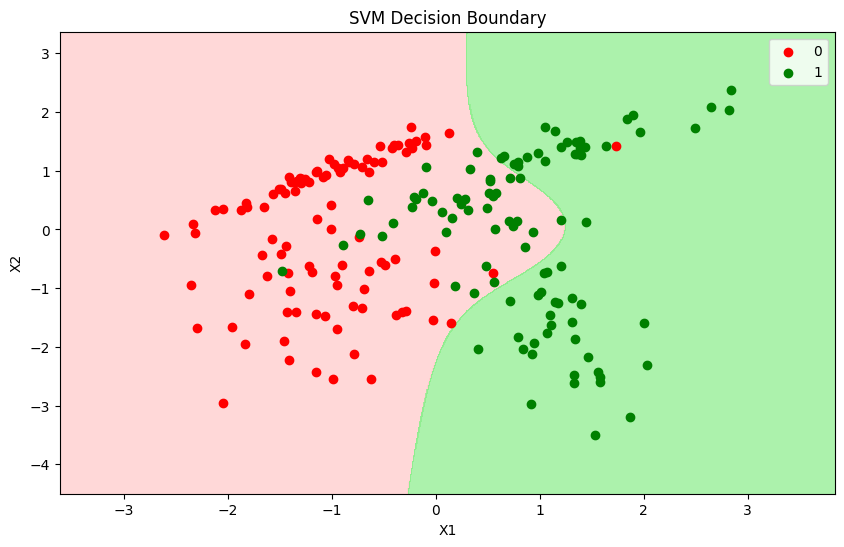

In [16]:
plot_decision_boundary(X, y, classifier_3)

##### Inference
Our acc has increased from 50 to 80. And also, a clear decision boundary is created here. The right side region is the region where etire region would be classified as class 1 and vice versa. But still there is a good amount of misclassification as well, but still it is better than what we had initially.

## Note:
Till now we have never tweaked 'c' parameter. We have kept as a constant 1 so far, so that we can see the impact of gamma hyperparmeter.

# Classifier 4 - Gamma = 1

In [17]:
classifier_4 = generate_clf(1)

Training Accuracy = 0.93


C:\Users\Chetan\AppData\Local\Temp\ipykernel_21396\1724256829.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


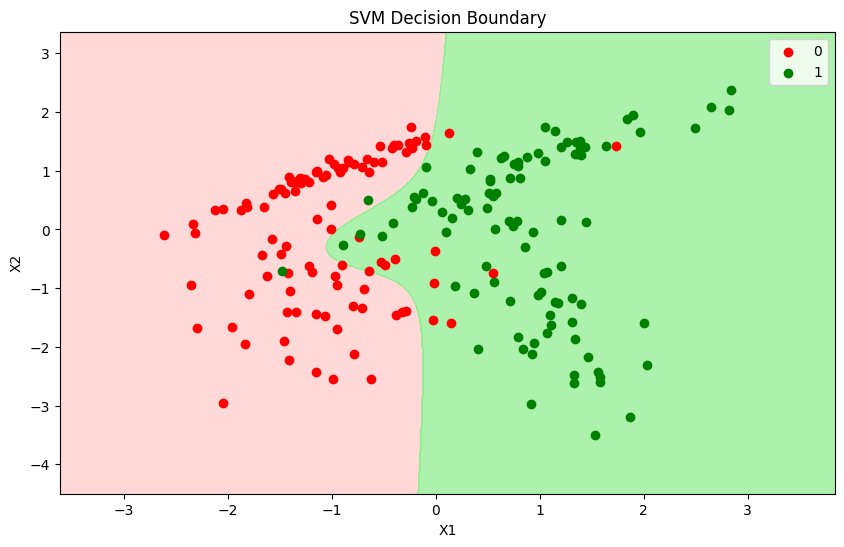

In [18]:
plot_decision_boundary(X, y, classifier_4)

##### Inferences
Can clearlt see that the green boundary has shifted towards the left now. This is a better classifier when compared to other classfiers so far.

## Learning Point: As we are increasing the gamma value, the similarity distance between points is getting decreased. That's the reason why not every point is classified into 1 group, so there are 2 definite groups been formed as we keep on increasing the gamma value.

# Classifier 5 - Gamma = 0.1 & C = 0.1

Going further, we keep gamma constant and tweak c.

In [19]:
classifier_5 = generate_clf(0.1, 0.1)

Training Accuracy = 0.605


C:\Users\Chetan\AppData\Local\Temp\ipykernel_21396\1724256829.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


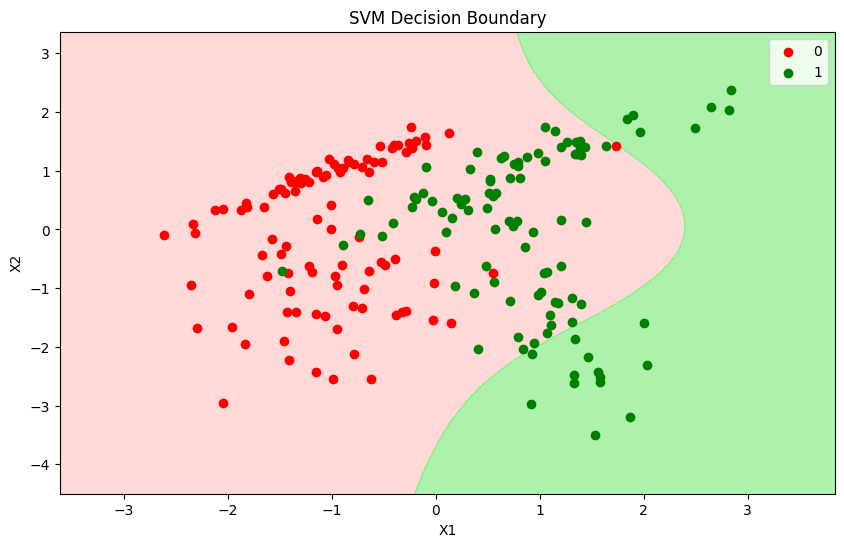

In [20]:
plot_decision_boundary(X, y, classifier_5)

# Classifier 6 - Gamma = 0.1 & C = 1


In [21]:
classifier_6 = generate_clf(0.1, 1)

Training Accuracy = 0.795


C:\Users\Chetan\AppData\Local\Temp\ipykernel_21396\1724256829.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


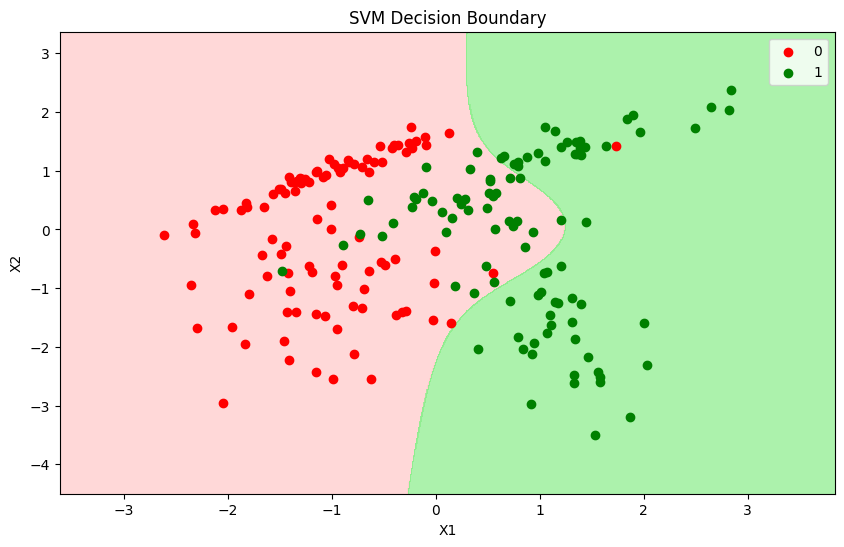

In [22]:
plot_decision_boundary(X, y, classifier_6)

# Classifier 7 - Gamma = 0.1 & C = 10


In [23]:
classifier_7 = generate_clf(0.1, 10)

Training Accuracy = 0.94


C:\Users\Chetan\AppData\Local\Temp\ipykernel_21396\1724256829.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


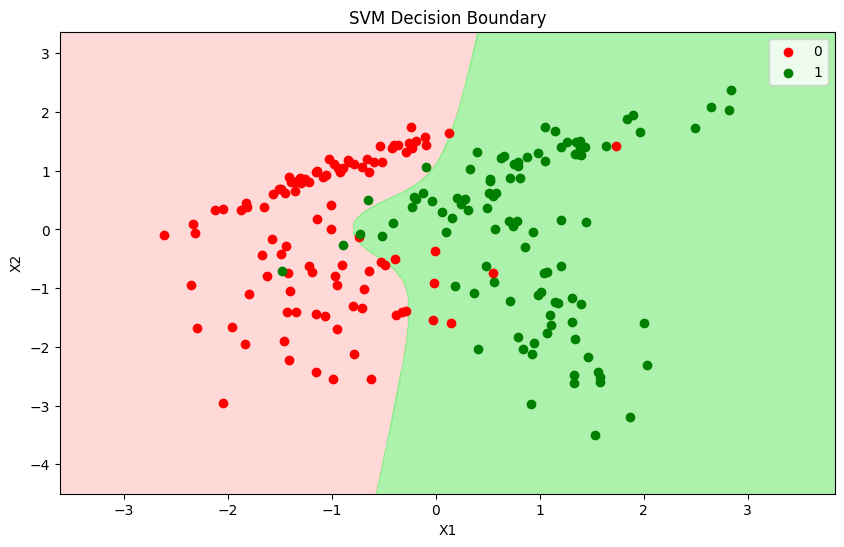

In [24]:
plot_decision_boundary(X, y, classifier_7)

##### iNFERENCE:
Most of red points lie in the red region and green points lie in the green region and green points in the green region. Why because we are giving higher weightage to every misclassification points while the training is going on.

## Disadvantages
Though the acc is great but the margin is shrunk greatly. So there are chances for our model to be overfitted.
So we have choose the best hyperparameter tuning for creating the best classifier to our dataset.